In [4]:
from matplotlib import pyplot as plt
import pandas as pd
from numpy import NaN

url = "https://letterboxd.com"

In [5]:
from bs4 import BeautifulSoup
import requests

In [6]:
url = "https://letterboxd.com"
username = "danieledisp"
watchlist_page = url + f"/{username}/watchlist/page/"
films = {"name": [], "link": []}

try:
    # 1 page --> 28 films
    for i in range(1, 9+1):  # the n. of pages now are 7 (168 < nFilms < 196)
        r = requests.get(watchlist_page + str(i))
        bs = BeautifulSoup(r.text, 'html.parser')
        ul = bs.find('ul', class_='poster-list')
        li_s = ul.find_all('li', class_='poster-container')
        for li in li_s:
            div = li.find('div')
            link = div.get('data-target-link')
            img = li.find('img')
            name = img.get('alt')
            films['name'].append(name)
            films['link'].append(link)
except AttributeError:
    print('No users found! (Maybe the user has a private account!)')

films = pd.DataFrame(films)
films

,name,link
0,Apartment 7A,/film/apartment-7a/
1,Terrifier 3,/film/terrifier-3/
2,Terrifier 2,/film/terrifier-2/
3,Caddo Lake,/film/caddo-lake/
4,The Apprentice,/film/the-apprentice-2024/
...,...,...
234,The Matrix,/film/the-matrix/
235,Jojo Rabbit,/film/jojo-rabbit/
236,Hereditary,/film/hereditary/
237,Black Swan,/film/black-swan/


In [7]:
from lxml import html

films['duration'] = [0]*len(films['link'])
films['rating'] = [0]*len(films['link'])

for i, l in enumerate(films['link']):
    r = requests.get(url + l)
    tree = html.fromstring(r.content)
    try:
        duration = int(tree.xpath('//*[@id="film-page-wrapper"]/div[2]/section[2]/p')[0].text.strip().split('mins')[0][:-1])
    except:
        duration = NaN    
    rating = float(tree.xpath('//head/meta[@name="twitter:data2"]')[0].get('content').split('out')[0][:-1]) if len(tree.xpath('//head/meta[@name="twitter:data2"]')) > 0 else NaN
    films['duration'][i] = duration
    films['rating'][i] = rating

films

C:\Users\danie\AppData\Local\Temp\ipykernel_7628\3922704491.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  films['duration'][i] = duration
C:\Users\danie\AppData\Local\Temp\ipykernel_7628\3922704491.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  films['rating'][i] = rating


,name,link,duration,rating
0,Apartment 7A,/film/apartment-7a/,106,2.72
1,Terrifier 3,/film/terrifier-3/,125,3.04
2,Terrifier 2,/film/terrifier-2/,138,2.75
3,Caddo Lake,/film/caddo-lake/,104,3.41
4,The Apprentice,/film/the-apprentice-2024/,123,3.61
...,...,...,...,...
234,The Matrix,/film/the-matrix/,136,4.16
235,Jojo Rabbit,/film/jojo-rabbit/,108,4.03
236,Hereditary,/film/hereditary/,128,3.96
237,Black Swan,/film/black-swan/,109,4.15


In [8]:
films.to_csv('watchlist.csv')

In [9]:
films = pd.read_csv('watchlist.csv')

In [10]:
films.sort_values(by="duration", ascending=True)

,Unnamed: 0,name,link,duration,rating
175,175,It's Such a Beautiful Day,/film/its-such-a-beautiful-day/,62,4.38
98,98,Yannick,/film/yannick-2023/,67,3.75
164,164,Following,/film/following/,69,3.47
20,20,Animal Farm,/film/animal-farm/,72,3.36
87,87,The Circus,/film/the-circus/,73,4.04
...,...,...,...,...,...
34,34,An Elephant Sitting Still,/film/an-elephant-sitting-still/,234,4.34
134,134,The Watcher,/film/the-watcher-2022/,336,2.83
106,106,Bodies,/film/bodies-2023/,455,3.65
183,183,Band of Brothers,/film/band-of-brothers/,594,4.70


In [11]:
availables = films.dropna(inplace=False)
availables

,Unnamed: 0,name,link,duration,rating
0,0,Apartment 7A,/film/apartment-7a/,106,2.72
1,1,Terrifier 3,/film/terrifier-3/,125,3.04
2,2,Terrifier 2,/film/terrifier-2/,138,2.75
3,3,Caddo Lake,/film/caddo-lake/,104,3.41
4,4,The Apprentice,/film/the-apprentice-2024/,123,3.61
...,...,...,...,...,...
234,234,The Matrix,/film/the-matrix/,136,4.16
235,235,Jojo Rabbit,/film/jojo-rabbit/,108,4.03
236,236,Hereditary,/film/hereditary/,128,3.96
237,237,Black Swan,/film/black-swan/,109,4.15


<AxesSubplot:xlabel='duration', ylabel='rating'>

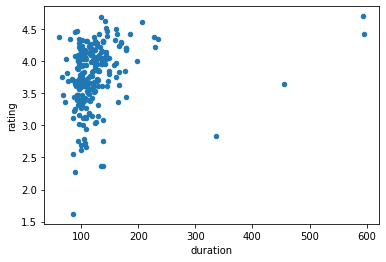

In [16]:
availables.plot(x="duration", y="rating", kind="scatter")


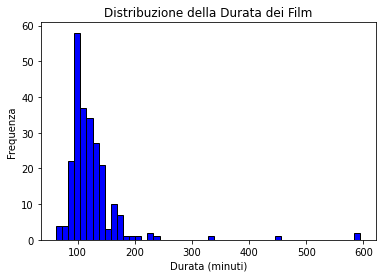

In [15]:
plt.hist(availables['duration'], bins=50, color='blue', edgecolor='black')
plt.title('Distribuzione della Durata dei Film')
plt.xlabel('Durata (minuti)')
plt.ylabel('Frequenza')
plt.show()

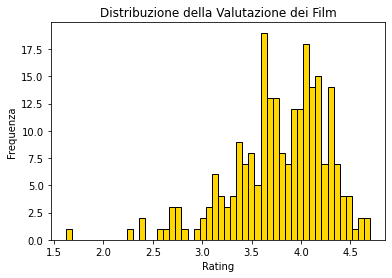

In [14]:
plt.hist(availables['rating'], bins=50, color='gold', edgecolor='black')
plt.title('Distribuzione della Valutazione dei Film')
plt.xlabel('Rating')
plt.ylabel('Frequenza')
plt.show()

In [13]:
res = availables[availables.duration < 90].sample()
res.link = url + res.link
print(res.link)

161    https://letterboxd.com/film/frankenweenie-2012/
Name: link, dtype: object
